# Introduction to Artificial Intelligence

### Description

This project was conducted as part of the coursework for the *“Introduction to Artificial Intelligence”* module in the MSc Artificial Intelligence programme at **City, University of London (City St George’s)** during the Autumn 2025 term. The project was completed by **Nasos Karas** and **Sania Verma**.

The study uses the **Ocular Disease Recognition (ODIR-5K)** dataset obtained from Kaggle, which consists of retinal images labeled across multiple ocular disease categories. The primary objective of this project is to investigate, compare, and fine-tune different artificial intelligence models, including classical machine learning and deep learning approaches, to address the task of ocular disease image classification.

To run this notebook, the following empty folders need to be created: resized_images, gray_images, gray_resized_images

First, let's import the required libraries

In [ ]:
import pandas as pd

Let's read the data from the CSV file

In [ ]:
import os
#os.chdir('/content/IntrotoAI')
df = pd.read_csv('full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


Converting each image into its vector and flattening it . (2D -> 1D)

We want to convert each image to a vector so that we are able to process the numerical data for classification. To do so, we will create a new column in the dataframe and store the feature vector of each data point(image) into the corrosponding row.

In [ ]:
from PIL import Image
import numpy as np
import os

image_folder = 'preprocessed_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data'] = flat_vector
df


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


This dataset contains 8 classes. To check whether they are balanced we can check how many occurences each class has from the labels column.

In [ ]:
import ast
df['labels'] = df['labels'].apply(lambda x: ast.literal_eval(x)[0])
df['labels'].value_counts(normalize=True) * 100


,proportion
labels,
N,44.946809
D,25.156446
O,11.076345
C,4.583855
G,4.443054
A,4.161452
M,3.629537
H,2.002503


Let's plot the multi-class distribution to have a better understanding.

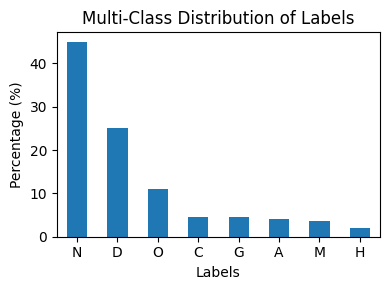

In [ ]:
import ast
import matplotlib.pyplot as plt

label_counts = df['labels'].value_counts(normalize=True) * 100

plt.figure(figsize=(4,3))
label_counts.plot(kind='bar')

plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('Multi-Class Distribution of Labels')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()


Due to the high imbalance of the classes (highest class is 45% and lowest class is only 2%) we decided to work with binary classification; class = 1 for all normal labels, and class=0 for all others. To do so, we will check the target column of the dataset. If the first value is 1 it means the value is normal, otherwise it is abnormal (class=0).

In [ ]:
import ast

clean_targets = []    # initializing the empty list
for value in df['target']:
    if isinstance(value, str):
        value = ast.literal_eval(value)    # converting str to real numbers indicating "[1,0,0]" -> [1,0,0]
    clean_targets.append(value)
df['target'] = clean_targets       # every row in the column target in the dataframe has value for eg. [0,0,1]

# Convert list to single value 1 or 0
new_targets = []
for value in df['target']:   # each value is a list now
    first_element = value[0]   # extracting the first element of every list

    if first_element == 1:
        new_targets.append('1')
    else:
        new_targets.append('0')

df['target'] = new_targets


After the binary class transformation, we will check again the balance of the 2 classes

In [ ]:
df['target'].value_counts(normalize=True)*100

target
0    55.053191
1    44.946809
Name: proportion, dtype: float64

We can see now that the 2 classes are quite balanced (55-45%). We can also plot a diagram to see this in practice.

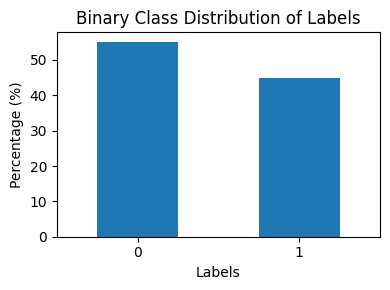

In [ ]:
import ast
import matplotlib.pyplot as plt

label_counts = df['target'].value_counts(normalize=True) * 100

plt.figure(figsize=(4,3))
label_counts.plot(kind='bar')

plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('Binary Class Distribution of Labels')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

After the necessarry transformations, we are going to print the finalized dataframe with the binary classes and the new column ("input_data") for the vectors of our images.

In [ ]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg


Now we want to print the shape of the vectors to check how many features each image has

In [ ]:
print(flat_vector.shape)

(786432,)


After realizing that each image has approximately 780.000 features we need to reduce the number of features to be able to run the analyses. One solution to that problem is downsizing the dimensions of the images to 100X100.

In [ ]:
import os
from PIL import Image

input_folder = "preprocessed_images"
output_folder = "resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)

print("All images resized to 100×100 successfully!")

All images resized to 100×100 successfully!


Now we need to see how much our features have been reduced by downsizing the images to 100X100. To do so, we will just check the first image of the resized_images folder, create its vector, flatten it and check its shape.

In [ ]:
from PIL import Image
import numpy as np
import os
path="resized_images/0_left.jpg"
img = Image.open(path).convert('RGB')
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector1 = img_array.flatten()
flat_vector1.shape

(30000,)

After downsizing the images, we managed to reduce the no. of features from 780.000 to 30.000 which is more easy to handle. Now we need to create the dataset with the vectors of all resized images. We will save the vectors of resized images to the same df, in a new column called input_data_resized

In [ ]:
from PIL import Image
import numpy as np
import os

image_folder = 'resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_data_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_data_resized'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,input_data_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg,"[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg,"[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg,"[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ..."


## Working with Grayscale Images

Apart from our colored data, we also want to run the same analyses for grayscale images in order to be able to compare the results of coloured and grayscale pictures. To do so, we will convert all coloured preprocessed (original size) images to grayscale format. We need to create a folder called "gray_images" that will store all grayscale images.

In [9]:
import os
import cv2

input_folder = 'preprocessed_images'
output_folder = 'gray_images'
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, gray_img)

print(f"All images have been converted to grayscale and saved to '{output_folder}'")

All images have been converted to grayscale and saved to 'gray_images'


After creating the grayscale images, we want to check the no. of features. We will just check the shape of the first image of grayscale images folder.

In [ ]:
from PIL import Image
import numpy as np
import os
path="gray_images/0_left.jpg"
img = Image.open(path).convert('L')
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector2 = img_array.flatten()
flat_vector2.shape

(262144,)

After converting to grayscale with their original dimensions, the images have 260.000 features. We will also downsize the grayscale images to further reduce the no. of features. We will create a new folder called gray_resized_images and follow the same logic as in the coloured images.

In [10]:
import os
from PIL import Image

input_folder = "gray_images"
output_folder = "gray_resized_images"

for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg")):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize((100, 100))
        save_path = os.path.join(output_folder, filename)
        img_resized.save(save_path)

print("All grayscale images resized to 100×100 successfully!")

All grayscale images resized to 100×100 successfully!


Now, we need to check how much the features were reduced by downsizing the grayscale images

In [ ]:
from PIL import Image
import numpy as np
import os
path="gray_resized_images/0_left.jpg"
img = Image.open(path).convert('L')
img_array = np.array(img)
# flattening the vector to shape 1D from 2D
flat_vector3 = img_array.flatten()
flat_vector3.shape

(10000,)

We managed to reduce the number of grayscale images from 260.000 to just 10.000 features.

Now we want to add to our dataframe the vectors for both original and resized grayscale images. We will use the same logic as in coloured images.

In [ ]:
image_folder = 'gray_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_gray'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_gray'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,H,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
image_folder = 'gray_resized_images'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
df['input_gray_resized'] = None
# Looping the files inside the preprocessed_images folder
for file in image_files:
    path = os.path.join(image_folder, file)
    img = Image.open(path).convert('L')
    img_array = np.array(img)
    # flattening the vector to shape 1D from 2D
    flat_vector = img_array.flatten()
    mask = df['filename'] == file     # if the file name matches then storign that information either true or false into variable "Mask"
    for idx in df[mask].index:
        df.at[idx, 'input_gray_resized'] = flat_vector
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,...,M,O,filepath,labels,target,filename,input_data,input_data_resized,input_gray,input_gray_resized
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,0_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],1,1_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,2_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,...,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 0, 4, 4, 0, 4, 3, 0, 2, 3, 0, 2, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,5_right.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4686_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4688_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4689_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,...,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],0,4690_left.jpg,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## PCA

We have managed to reduce the no. of features by downsizing the images (30.000 for coloured and 10.000 for grayscale). We will also apply PCA on both grayscale images and coloured to further reduce their features.

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## Applying PCA on coloured resized images 100x100

In [ ]:
b = df["input_data_resized"].values
X1 = np.stack(b)
Y1 = df["target"].values
X1.shape, Y1.shape


((6392, 30000), (6392,))

In [ ]:
print(f'Total samples: {X1.shape[0]}, Features per sample: {X1.shape[1]}')

Total samples: 6392, Features per sample: 30000


After having created our X1 and Y1 values, we also need to apply standardization (mean=0, std=1) to our X1 data.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [ ]:
print(X1, X_scaled)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 3 2 ... 0 0 0]
 [0 0 4 ... 0 0 0]] [[-0.06002341 -0.06233869 -0.08017856 ... -0.04849952 -0.04849952
  -0.04849952]
 [-0.06002341 -0.06233869 -0.08017856 ... -0.04849952 -0.04849952
  -0.04849952]
 [-0.06002341 -0.06233869 -0.08017856 ... -0.04849952 -0.04849952
  -0.04849952]
 ...
 [-0.06002341 -0.06233869 -0.08017856 ... -0.04849952 -0.04849952
  -0.04849952]
 [-0.06002341  0.18067954  0.0809094  ... -0.04849952 -0.04849952
  -0.04849952]
 [-0.06002341 -0.06233869  0.24199735 ... -0.04849952 -0.04849952
  -0.04849952]]


In [ ]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f'Reduced features shape: {X_pca.shape}')

Reduced features shape: (6392, 36)


Text(0, 0.5, 'cumulative explained variance')

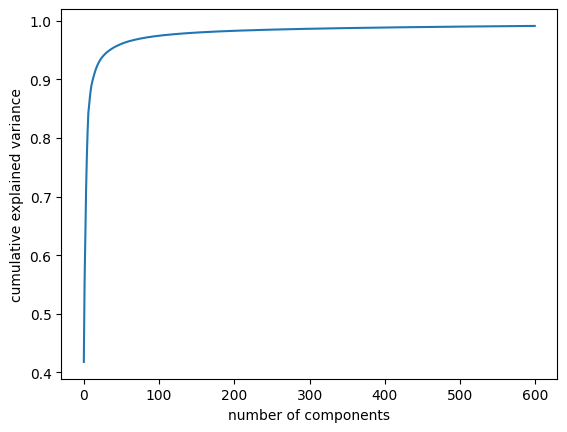

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))

Cumulative: [0.41788384 0.55238598 0.63736319 0.71075523 0.76690689 0.81069075
 0.84279793 0.85622769 0.86884856 0.88028147 0.88917591 0.89521602
 0.90040527 0.90523767 0.9096385  0.91394111 0.91777147 0.92111995
 0.92417696 0.92705342 0.9295676  0.93188564 0.93395737 0.93580116
 0.93757009 0.93913813 0.94063459 0.94200569 0.94333374 0.94462219
 0.94573521 0.94680793 0.94784831 0.94885597 0.94982812 0.95072146]


In [ ]:
X_pca.shape, Y1.shape

((6392, 36), (6392,))

We have reduced the no. of components to just 36 features by keeping 95% of variance.

Applying PCA on grayscale images 100x100

In [ ]:
b = df["input_gray_resized"].values
X2 = np.stack(b)
Y2 = df["target"].values
X2.shape, Y2.shape

((6392, 10000), (6392,))

Applying standardization for grayscale images too

In [ ]:
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X2)

In [ ]:
pca2 = PCA(n_components=0.95,random_state=42) #TODO: variance or no. of components
X_pca2 = pca2.fit_transform(X_scaled_2)

print(f'Reduced features shape: {X_pca2.shape}')

Reduced features shape: (6392, 22)


Text(0, 0.5, 'cumulative explained variance')

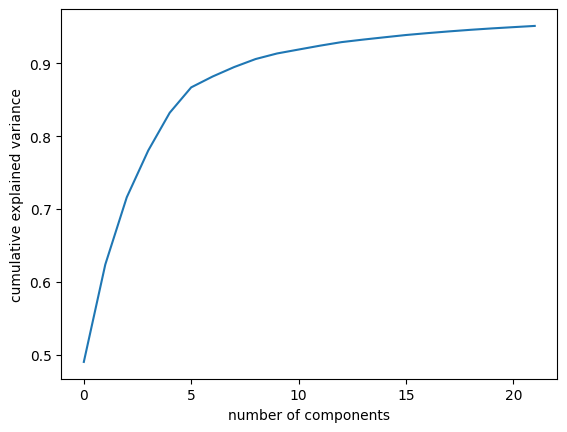

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
print("Cumulative for grayscale:", np.cumsum(pca2.explained_variance_ratio_))

Cumulative for grayscale: [0.48995361 0.62379624 0.71616807 0.78040508 0.83228584 0.86715086
 0.88210379 0.89506089 0.90608663 0.91374089 0.91912534 0.92445321
 0.92932418 0.93276929 0.93596766 0.93909015 0.94167248 0.94404899
 0.94622845 0.94816958 0.94990197 0.95158756]


In [ ]:
X_pca2.shape, Y2.shape

((6392, 22), (6392,))

We have reduced the no. of features for grayscale images to just 22 while keeping 95% of the variance.

## Train_Test Splitting

Let's split our dataset into training and testing for coloured images

Stratify- Ensures that the proportion of a target variable's classes is the same in training, testing and testing sets as it was in the original
The dataset has been split into the following manner:
1. Firstly the dataset is split into train and test which 80% for training and 20% for testing maintaining the distribution of the class in each folder using Stratify.
2. Secondly the test data is further split into 10% tetsing and 10% validation dataset again maintaing the distribution of the classes in the dataset .
Overall, the entire dataset is split in the ratio 80:10:10 (80% training, 10% testing and 10% validation)

In [ ]:
#splitting the dataset into train and testing which is 80% training and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(
    X_pca, Y1, test_size=0.20, random_state=42, shuffle=True, stratify=Y1
)

# Now splitting the dataset into test and validation where 20% breaks down to 10% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True, stratify=y_temp
)

print(f"Training data: {X_train.shape}, Validation data: {X_val.shape}, Test data: {X_test.shape}")

Training data: (5113, 36), Validation data: (639, 36), Test data: (640, 36)


Below there is a table with the no. of features of images for each step of the preprocessing process

| Images | Non-resized (512x512) |  Resized (100x100) | PCA(95% variance) |
|-------|----------|---------------|--------------------|
| Colour   | 780.000     | 30.000         | 36                |
| Grayscale   | 260.000   | 10.000          | 22               |
